# Compute functionals from the YoungAdult data
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
In this notebook I will apply the schematic from the 'Essentials.ipynb' and 'Complete_progress.ipynb' files to compute the min_energy, max_entropy and free_energy from the YoungAdult dataset.

In [97]:
# Import necessary libraries
import numpy as np
import glob
import os

# Import external background functions
%run background_functions.py

In [99]:
# List to store matrices and file names together
data_list = [(os.path.basename(file), np.genfromtxt(file)) for file in glob.glob('1000_Functional_Connectomes\Connectivity matrices/*.txt')]

# Print the matrices and corresponding file names
#for file_name, matrix in data_list:
#    print(f"Matrix from {file_name}:\n{matrix}\n")

In [100]:
# Define desired settings
cutoff=0.4 # Value between 0 and 1. Values below this value are set to zero. Becomes obsolete after including phase randomisation
max_dim=4
M = data_list[0][1] # The first matrix is the averaged matrix

In [101]:
U_min, p_Umin, S_max, p_Smax, Free_energy = computing_functionals(M,cutoff,max_dim)

C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\background_functions.py:34: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


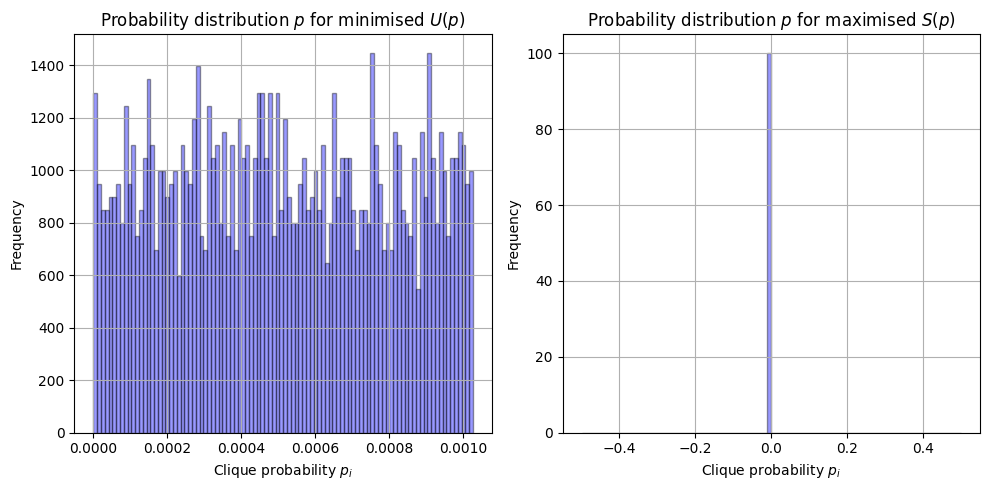

In [102]:
# Plotting the probability distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(p_Umin, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.xlabel('Clique probability $p_i$')
plt.ylabel('Frequency')
plt.title('Probability distribution $p$ for minimised $U(p)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(p_Smax, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.xlabel('Clique probability $p_i$')
plt.ylabel('Frequency')
plt.title('Probability distribution $p$ for maximised $S(p)$')
plt.grid(True)

plt.tight_layout()
plt.show()

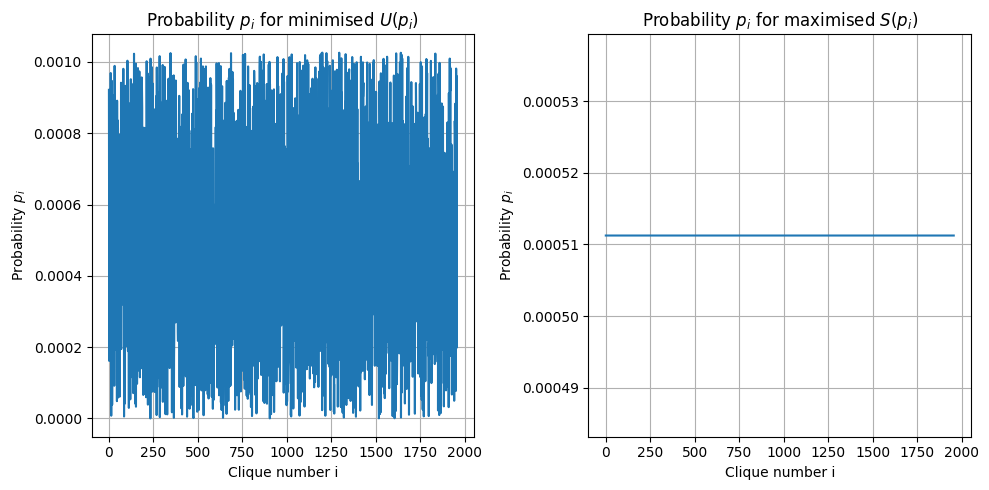

In [103]:
# Plotting the probability distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(p_Umin)
plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Probability $p_i$ for minimised $U(p_i)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(p_Smax)
plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Probability $p_i$ for maximised $S(p_i)$')
plt.grid(True)

plt.tight_layout()
plt.show()